In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import imutils

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):    
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(89,122,255), thickness=1, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(29,226,200), thickness=1, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(153,255,51), thickness=1, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(153,51,255), thickness=1, circle_radius=2)
                                 )

In [5]:
# IGNORE
cap = cv2.567VideoCapture(0)

# Set mediapipe model, if you want higher or lower, change confidence number
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_styled_landmarks(frame, results)

In [7]:
# IGNORE
results

mediapipe.python.solution_base.SolutionOutputs

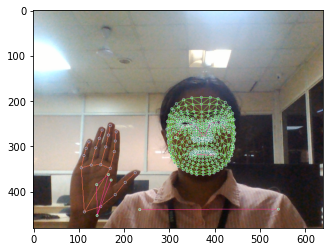

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
# IGNORE
cap = cv2.VideoCapture(0)
while cap.isOpened():
    
    # Read Feed
    ret, frame = cap.read()
    
    # Show to Screen
    cv2.imshow('OpenCV Feed', frame)
    
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
# IGNORE
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
# IGNORE
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
pose

array([ 5.89534700e-01,  5.84082067e-01, -1.17815983e+00,  9.99838829e-01,
        6.13900781e-01,  5.16142905e-01, -1.11238956e+00,  9.99792993e-01,
        6.32494509e-01,  5.16853511e-01, -1.11285305e+00,  9.99709249e-01,
        6.47674680e-01,  5.18448055e-01, -1.11280751e+00,  9.99652386e-01,
        5.54903567e-01,  5.23102105e-01, -1.10397804e+00,  9.99807477e-01,
        5.34290373e-01,  5.27400315e-01, -1.10401726e+00,  9.99792516e-01,
        5.15951395e-01,  5.33378303e-01, -1.10442424e+00,  9.99827147e-01,
        6.76211119e-01,  5.62276244e-01, -6.22457266e-01,  9.99640703e-01,
        4.91669744e-01,  5.84470570e-01, -5.68579555e-01,  9.99835312e-01,
        6.30647063e-01,  6.65121853e-01, -9.91793811e-01,  9.99767125e-01,
        5.58409095e-01,  6.63858414e-01, -9.78737831e-01,  9.99831021e-01,
        8.45676064e-01,  9.13364112e-01, -3.19400668e-01,  9.84241426e-01,
        3.67780864e-01,  9.16329265e-01, -2.74721593e-01,  9.95752096e-01,
        9.81133819e-01,  

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('FinalM-P') 

# Actions that we try to detect
actions = np.array(['M','N','O','P'])

# Five videos worth of data
no_sequences = 5

# Videos are going to be 5 frames in length
sequence_length = 5

In [15]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
# IGNORE
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    for action in actions:
        # Loop through sequences aka videos : 20 Videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length : 5 Frames
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = imutils.resize(frame,width = 500,height = 1000)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'M': 0, 'N': 1, 'O': 2, 'P': 3}

In [24]:
sequences, labels = [], []
no_sequences = 5
sequence_length = 5
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape
X_train.shape

(19, 5, 1662)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [26]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [27]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=350, callbacks=[tb_callback])

Epoch 1/350
1/1 [==============================] - 11s 11s/step - loss: 1.3856 - categorical_accuracy: 0.3158
Epoch 2/350
1/1 [==============================] - 0s 92ms/step - loss: 1.3804 - categorical_accuracy: 0.2632
Epoch 3/350
1/1 [==============================] - 0s 73ms/step - loss: 1.3765 - categorical_accuracy: 0.2632
Epoch 4/350
1/1 [==============================] - 0s 96ms/step - loss: 1.3775 - categorical_accuracy: 0.2632
Epoch 5/350
1/1 [==============================] - 0s 83ms/step - loss: 1.3546 - categorical_accuracy: 0.2632
Epoch 6/350
1/1 [==============================] - 0s 64ms/step - loss: 1.3160 - categorical_accuracy: 0.2632
Epoch 7/350
1/1 [==============================] - 0s 62ms/step - loss: 1.2786 - categorical_accuracy: 0.2632
Epoch 8/350
1/1 [==============================] - 0s 62ms/step - loss: 1.2388 - categorical_accuracy: 0.4737
Epoch 9/350
1/1 [==============================] - 0s 59ms/step - loss: 1.1582 - categorical_accuracy: 0.5263
Epoch 10/3

1/1 [==============================] - 0s 66ms/step - loss: 5.3918e-05 - categorical_accuracy: 1.0000
Epoch 75/350
1/1 [==============================] - 0s 67ms/step - loss: 4.5155e-05 - categorical_accuracy: 1.0000
Epoch 76/350
1/1 [==============================] - 0s 61ms/step - loss: 3.9266e-05 - categorical_accuracy: 1.0000
Epoch 77/350
1/1 [==============================] - 0s 53ms/step - loss: 3.5427e-05 - categorical_accuracy: 1.0000
Epoch 78/350
1/1 [==============================] - 0s 63ms/step - loss: 3.3149e-05 - categorical_accuracy: 1.0000
Epoch 79/350
1/1 [==============================] - 0s 50ms/step - loss: 3.1707e-05 - categorical_accuracy: 1.0000
Epoch 80/350
1/1 [==============================] - 0s 65ms/step - loss: 3.0778e-05 - categorical_accuracy: 1.0000
Epoch 81/350
1/1 [==============================] - 0s 52ms/step - loss: 3.0138e-05 - categorical_accuracy: 1.0000
Epoch 82/350
1/1 [==============================] - 0s 63ms/step - loss: 2.9524e-05 - categor

1/1 [==============================] - 0s 64ms/step - loss: 8.8464e-06 - categorical_accuracy: 1.0000
Epoch 145/350
1/1 [==============================] - 0s 52ms/step - loss: 8.7711e-06 - categorical_accuracy: 1.0000
Epoch 146/350
1/1 [==============================] - 0s 61ms/step - loss: 8.6833e-06 - categorical_accuracy: 1.0000
Epoch 147/350
1/1 [==============================] - 0s 236ms/step - loss: 8.6206e-06 - categorical_accuracy: 1.0000
Epoch 148/350
1/1 [==============================] - 0s 146ms/step - loss: 8.5390e-06 - categorical_accuracy: 1.0000
Epoch 149/350
1/1 [==============================] - 0s 96ms/step - loss: 8.4763e-06 - categorical_accuracy: 1.0000
Epoch 150/350
1/1 [==============================] - 0s 95ms/step - loss: 8.3947e-06 - categorical_accuracy: 1.0000
Epoch 151/350
1/1 [==============================] - 0s 116ms/step - loss: 8.3320e-06 - categorical_accuracy: 1.0000
Epoch 152/350
1/1 [==============================] - 0s 103ms/step - loss: 8.2378e-

1/1 [==============================] - 0s 59ms/step - loss: 4.0468e-06 - categorical_accuracy: 1.0000
Epoch 215/350
1/1 [==============================] - 0s 76ms/step - loss: 4.0217e-06 - categorical_accuracy: 1.0000
Epoch 216/350
1/1 [==============================] - 0s 103ms/step - loss: 3.9966e-06 - categorical_accuracy: 1.0000
Epoch 217/350
1/1 [==============================] - 0s 95ms/step - loss: 3.9590e-06 - categorical_accuracy: 1.0000
Epoch 218/350
1/1 [==============================] - 0s 100ms/step - loss: 3.9401e-06 - categorical_accuracy: 1.0000
Epoch 219/350
1/1 [==============================] - 0s 69ms/step - loss: 3.9025e-06 - categorical_accuracy: 1.0000
Epoch 220/350
1/1 [==============================] - 0s 69ms/step - loss: 3.8711e-06 - categorical_accuracy: 1.0000
Epoch 221/350
1/1 [==============================] - 0s 78ms/step - loss: 3.8523e-06 - categorical_accuracy: 1.0000
Epoch 222/350
1/1 [==============================] - 0s 69ms/step - loss: 3.8335e-06

1/1 [==============================] - 0s 85ms/step - loss: 2.5849e-06 - categorical_accuracy: 1.0000
Epoch 285/350
1/1 [==============================] - 0s 116ms/step - loss: 2.5787e-06 - categorical_accuracy: 1.0000
Epoch 286/350
1/1 [==============================] - 0s 177ms/step - loss: 2.5661e-06 - categorical_accuracy: 1.0000
Epoch 287/350
1/1 [==============================] - 0s 84ms/step - loss: 2.5473e-06 - categorical_accuracy: 1.0000
Epoch 288/350
1/1 [==============================] - 0s 62ms/step - loss: 2.5285e-06 - categorical_accuracy: 1.0000
Epoch 289/350
1/1 [==============================] - 0s 62ms/step - loss: 2.5159e-06 - categorical_accuracy: 1.0000
Epoch 290/350
1/1 [==============================] - 0s 63ms/step - loss: 2.5034e-06 - categorical_accuracy: 1.0000
Epoch 291/350
1/1 [==============================] - 0s 60ms/step - loss: 2.4846e-06 - categorical_accuracy: 1.0000
Epoch 292/350
1/1 [==============================] - 0s 58ms/step - loss: 2.4657e-06

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             442112    
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-trai

In [30]:
res = model.predict(X_test)

model.save('action2.h5')

In [31]:
model.load_weights('action2.h5')

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
# IGNORE
#multilabel_confusion_matrix??

# [True Negative][False Positive]
# [False Negative][True Postive]
multilabel_confusion_matrix(ytrue,yhat)

array([[[0, 0],
        [0, 1]]], dtype=int64)

In [33]:
accuracy_score(ytrue, yhat)

1.0

In [34]:
from scipy import stats
colors = [(245,117,16), (117,245,16), (16,117,245), (116,127,145), (10,287,15),(12,267,125),(1,234,235)
          ,(10,145,189),(24,165,134),(145,146,147),(234,215,217),(123,124,125),(145,156,100),(130,100,179)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [43]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Resize Feed to be bigger
        frame = imutils.resize(frame,width = 1000,height = 1000)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-5:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (1,0), (700, 40), (245, 117, 16), -1)
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('m'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [39]:
# IGNORE
# Call If webcame is still Focused
cap.release()
cv2.destroyAllWindows()

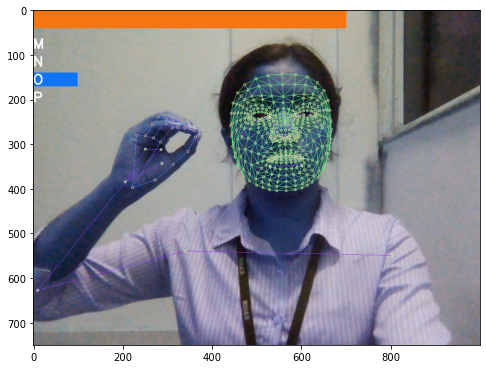

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res, actions, image, colors))